In [8]:
from PIL import Image
import matplotlib.pyplot as plt

True

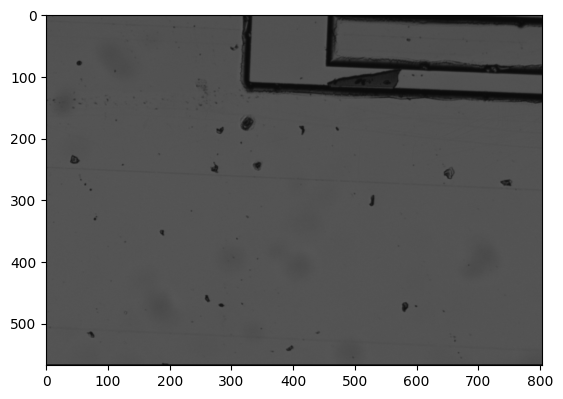

In [52]:
import cv2
import numpy as np

img = cv2.imread('BL.PNG')
img = img[200:, 200:-10]
plt.imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
eges = edges[100:-100]

lines = cv2.HoughLines(gray,1,np.pi/180,1)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
# plt.imshow(img)
cv2.imwrite('houghlines3.jpg',img)

(-0.5, 1013.5, 767.5, -0.5)

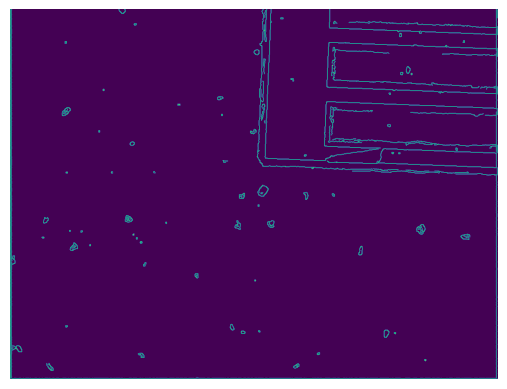

In [46]:
plt.imshow(edges)
plt.axis('off')

(768, 1014)


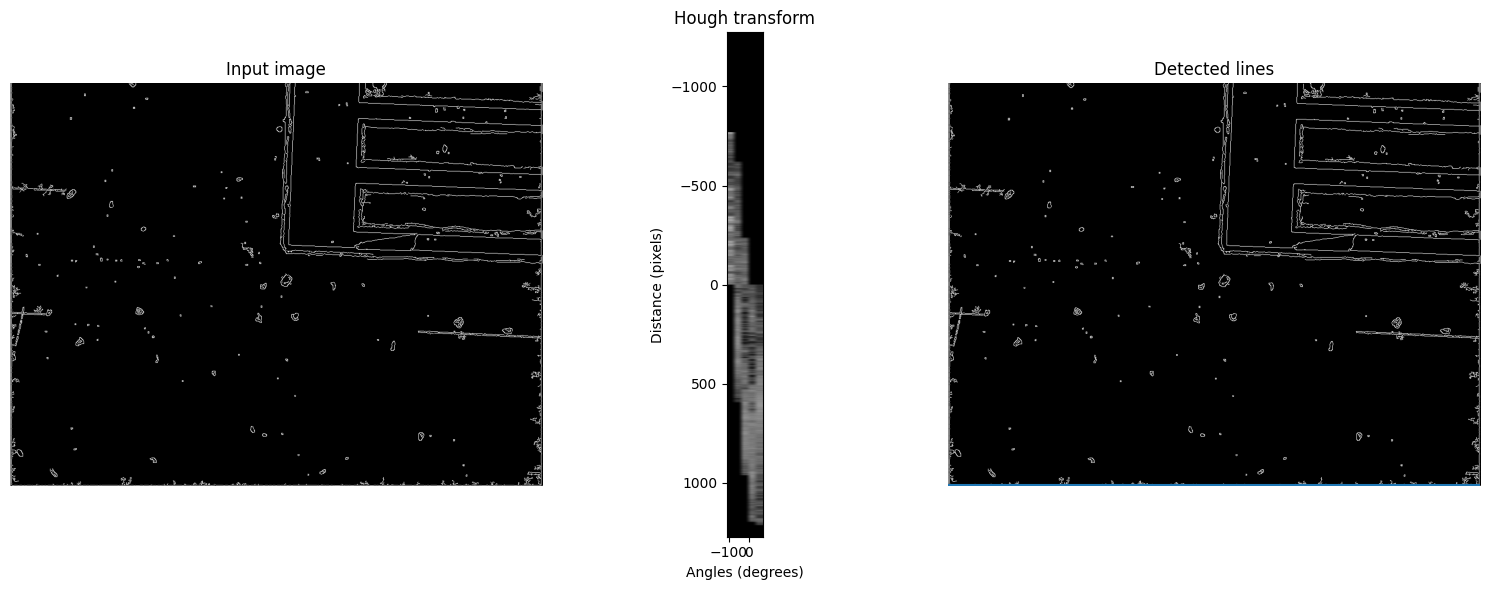

In [66]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
# image = np.zeros((200, 200))
# idx = np.arange(25, 175)
# image[idx, idx] = 255
# image[draw_line(45, 25, 25, 175)] = 255
# image[draw_line(25, 135, 175, 155)] = 255
image = np.array(Image.open('BL.PNG').convert("L"))
image = cv2.Canny(image, 0, 100, apertureSize=3)
print(image.shape)

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 5, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

In [104]:
img = cv2.imread("BL.png",0)
img = cv2.Canny(img, 20, 200, apertureSize=3)

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

#Detect lines in the image
lines = lsd.detect(img)[0] #Position 0 of the returned tuple are the detected lines
# lines = list(lines).sort(reverse=True, key = lambda x: )

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

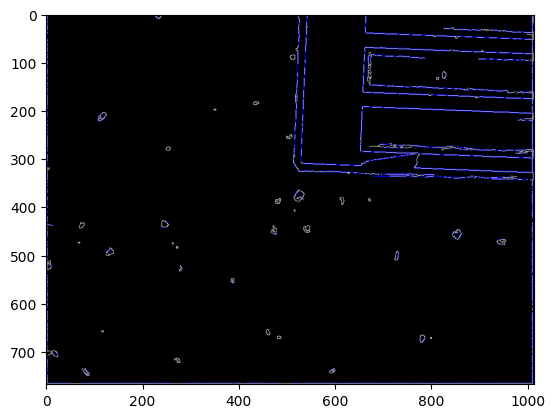

In [105]:
plt.imshow(drawn_img)

In [73]:
lines[1]

array([[911.78906, 281.31982, 833.31165, 271.61575]], dtype=float32)

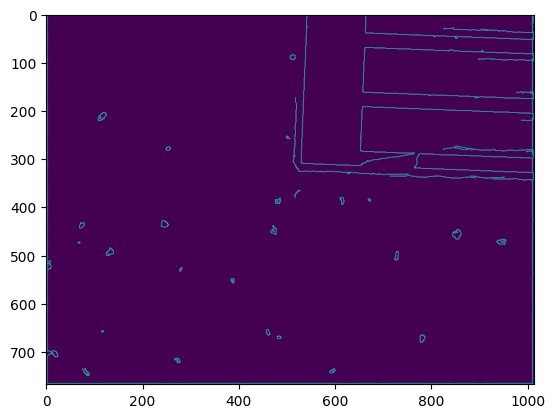

In [99]:
im = cv2.imread("BL.PNG")
# kernel = np.ones((16,16),np.float32)/(16 * 16)
# im = cv2.filter2D(im,-1,kernel)
im = cv2.Canny(im, 255/4, 255, apertureSize=3)
plt.imshow(im)

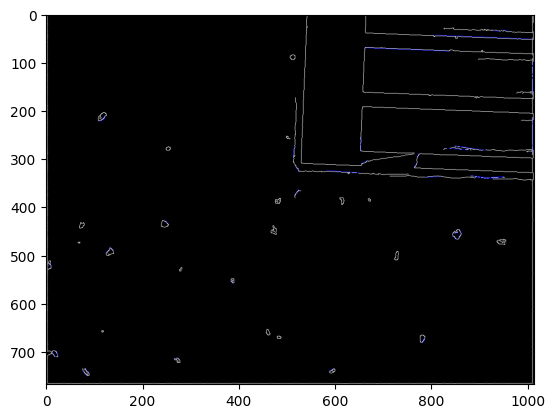

In [102]:

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

#Detect lines in the image
lines = lsd.detect(im)[0] #Position 0 of the returned tuple are the detected lines
lines = lines[0:len(lines) // 5]

#Draw detected lines in the image
drawn_img = lsd.drawSegments(im,lines)
plt.imshow(drawn_img)

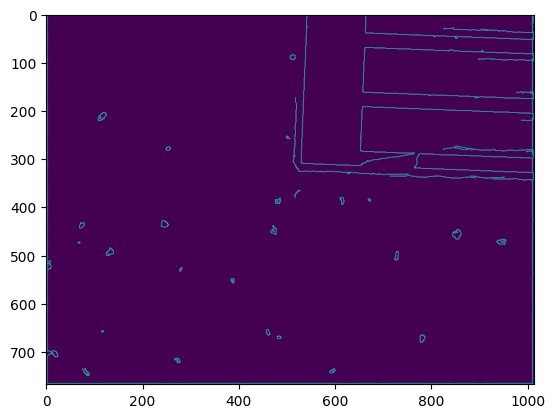

In [101]:
plt.imshow(im)